파이썬 머신러닝 완벽 가이드 개정 2판 8장 p.534-538, p.550-565

### **[개념정리 & 코드필사]**

### **06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

- 토픽모델링: 문서 집합에 숨어 있는 중요 주제를 찾아내는 것. 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- 토필모델링 기법: LDA(차원축소의 LDA와 구분에 유의)
  - 사이킷런의 LatentDirichletAllocation()
- 실습: 20가지의 주제를 가진 뉴스그룹 데이터 세트에서 8개의 주제를 추출해 LDA 기반 토픽 모델링 진행
  - 추출한 텍스트를 Count 기반으로 벡터화 변환 -> LDA는 Count기반 벡터화만 사용하기 때문
    - max_features(word 피처 개수 제한), ngram_range 설정
    - LatentDirichletAllocation클래스: n_components로 토픽 개수 조정, fit(데이터)로 속성값 가짐
      - components_: 개별 토픽별 각 word 피처가 얼마다 많이 그 토픽에 할당됐는지에 대한 수치. 높을수록 중심 word임.
     - display_topics() 함수를 만들어서 각 토픽별 연관도가 높은 순으로 Word를 나열
- Topic 별 주제어 추출 가능. 대부분 토픽에서 명확한 주제어가 추출됨




In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x',
        'talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),
                             categories = cats, random_state=0)

# LDA는 count 기반의 벡터화만 적용함
count_vect = CountVectorizer(max_df=0.95, max_features=100, min_df=2, stop_words='english',ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 100)


In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 100)


array([[5.41235723e+02, 4.19819341e+02, 1.00412490e+03, 8.26124846e+02,
        4.91353512e+00, 4.59805499e+01, 4.17485663e-01, 1.20833316e+01,
        4.48893150e+00, 1.25037326e-01, 1.16532717e+02, 5.20432680e+01,
        1.25098033e-01, 1.25110856e-01, 1.25033053e-01, 3.78815911e+01,
        4.73430735e+01, 5.47846367e-01, 9.58358074e+01, 1.41511360e+02,
        2.21996541e+00, 1.20452586e+01, 1.25068759e-01, 2.14911815e+01,
        1.28727744e-01, 9.17270945e+00, 1.25005602e-01, 1.77274683e+00,
        1.25682144e+02, 9.80351004e+00, 4.46102338e+00, 1.25007050e-01,
        1.25034750e-01, 1.80724465e+01, 1.57307829e+00, 7.41791075e+00,
        1.25014613e-01, 1.71752655e+02, 5.33203835e+01, 1.25064100e-01,
        1.01911856e+02, 1.65894752e-01, 1.25037738e-01, 2.79999619e+02,
        1.25000001e-01, 3.99979596e+01, 3.46184560e+00, 6.95965505e+01,
        9.84659825e+01, 1.87005802e+01, 4.08652934e-01, 2.99597778e+01,
        7.40850452e+00, 1.03927061e+02, 2.20563130e+01, 4.014930

In [ ]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그값의 array 인덱스를 반환.
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 면칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
armenian armenians turkish people 10 said new 12 years year number world jews university time
Topic # 1
people know say don think said did israel just believe like church right time way
Topic # 2
thanks does know help information need like use using mail want program work question problem
Topic # 3
image jpeg file color files bit display use version program software don available graphics read
Topic # 4
just don like good time ve think use make better really used year problem way
Topic # 5
edu com available graphics ftp data server mail information based version software file use subject
Topic # 6
windows dos list university software version window server graphics run color display ve new mail
Topic # 7
god window use jesus file program set read subject line make number does case way


### **08. 문서 유사도**

(1) 문서 유사도 측정 방법 - 코사인 유사도

- 문서와 문서 간의 유사도 측정에 사용. 벡터와 벡터간의 유사도 비교에서 벡터의 크기보다 벡터의 상호방향성의 유사성에 기반함. 즉, 두 벡터의 사잇각으로 유사성을 수치로 적용


(2)  두 벡터 사잇값

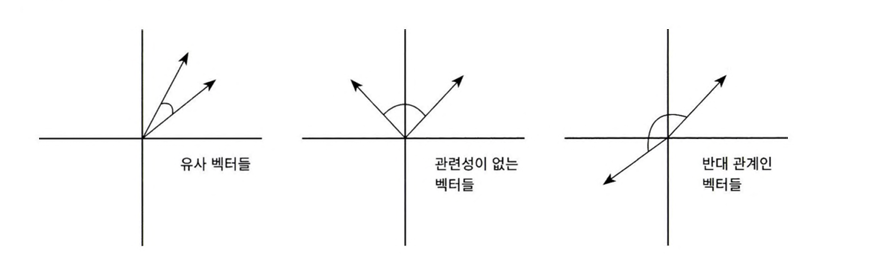


사잇값에 따라 상호관계는 위와 같음

- 두 벡터 A와 B의 코사인 값: $A*B = ||A||||B|| * cosθ$
- 유사도 similarity = cosθ: 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것
  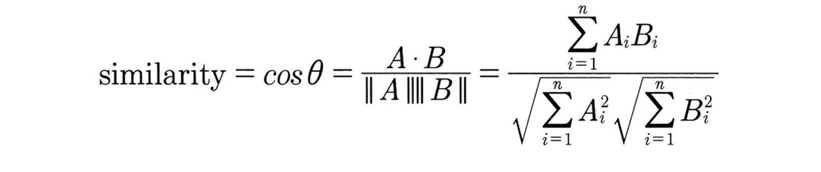

- 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움. 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉽고 빈도수에만 기반해서는 공정한 비교가 어려움(빈도가 많다고 밀접한 문서는 아님)

- 문서의 유사도를 비교하기 위해 문서를 TF-IDF로 벡터화된 행렬로 변환, 반환된 희소행렬을 밀집 행렬로 변환한 뒤 각각을 다시 배열로 변환. 만든 함수로 문서 유사도 측정
  - 문장 별 유사도 측정
  - 사이킷런의 sklearn. metrics. pairwise. cosine_similarity API로 코사인 유사도 측정가능: 파라미터는 기준 문서의 피처 행렬, 비교되는 문서의 피처 행렬
    - cosine_similarity()는 희소, 밀집 행렬이 모두 가능함. 행렬/배열 모두 가능함. 별도의 변환작업 필요없음
    - 쌍으로 코사인 유사도 값을 제공할 수 있음.

(3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정

- 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서간의 유사도를 알아보는 실습
- 각 문서가 피처 벡터화된 데이터를 cosine_simularity()로 상호비교해 유사도 확인
- 유사도가 높은 순으로 정렬하고 시각화하면 간결하게 확인가능

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))) * np.sqrt(sum(np.square(v2)))
  similarity = dot_product / l2_norm

  return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take thr red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 19)


In [ ]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장 2 Cosine 유사도: 0.254


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장 3 Cosine 유사도: 0.465
문장2, 문장 3 Cosine 유사도: 0.339


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.25414421 0.4653398 ]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.25414421 0.4653398 ]]


In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.25414421 0.4653398 ]
 [0.25414421 1.         0.33858866]
 [0.4653398  0.33858866 1.        ]]
shape: (3, 3)


- Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [ ]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import drive
drive.mount('/content/drive')

nltk.download('punkt')
nltk.download('wordnet')

def LemNormalize(text):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Opinion Review 데이터 세트를 이용한 문서 유사도 측정
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans



path = '/content/drive/MyDrive/ESAA/OB 과제/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([9, 10, 17, 20, 21, 22, 26, 34, 36, 48], dtype='int64')
##### 비교 기준 문서명 comfort_honda_accord_2008 와 타 문서 유사도 #####
[[1.         0.80785813 0.23215607 0.30507128 0.26618808 0.14396506
  0.15666297 0.16004019 0.65953338 0.06754912]]


가장 유사도가 큰 파일명 및 유사도:
 filename      comfort_toyota_camry_2007
similarity                     0.807858
Name: 10, dtype: object


Text(0.5, 1.0, 'comfort_honda_accord_2008')

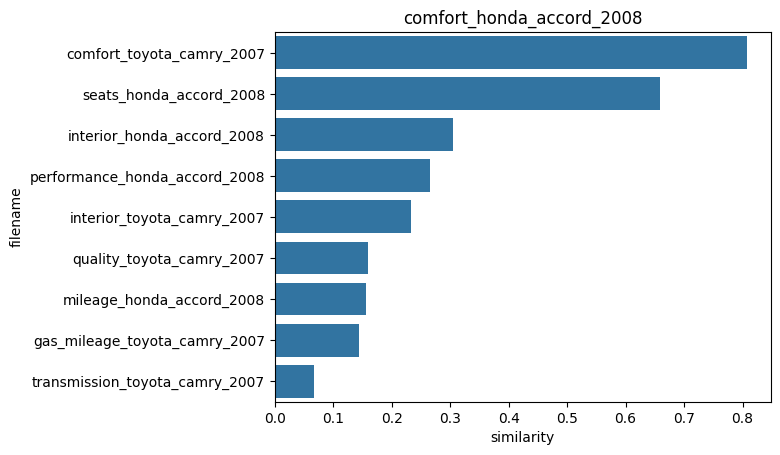

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

### **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

(1) 한글 NLP 처리의 어려움

띄어쓰기와 다양한 조사 때문에 의미가 왜곡될 수 있어 한글 언어 처리가 어려움. 조사는 경우의 수가 많아 어근 추출의 전처리 시 제거가 까다로움.

(2) KoNLPy소개

파이썬의 대표적인 한글 형태소 패키지
  - 형태소: 단어로서 의미를 가지는 최소 단위
  - 형태소 분석: 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업

- 사용을 위해서는 Java 클래스와 별도의 모듈인 Jpype1가 필요함.

(2) 데이터 로딩

0과 1 비율이 어느 한 쪽으로 치우치지 않고 균등한 분포를 나타냄.

- Null은 공백으로 변환. 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 공백으로 변환.
- TF-IDF 단어 벡터화. 각 문장을 한글 형태소 분석으로 형태소 단어로 토큰화함.
  - 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스 이용
  - morphs()이용시 입력 인자로 들어온 문장을 형태소 형태로 토큼화해 list 객체로 반환
- 로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행
- GridSearchCV를 이용해 하이퍼 파라미터 C 최적화
- 테스트 세트를 이용해 최종 감성 분석예측 수행. 학습 시 적용한 TfidfVectorizer 그대로 사용해 transform() 함에 유의.(변환 피처 개수 같아야함)


In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 16.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB 과제/ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [ ]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB 과제/ratings_test.txt', sep='\t', encoding='utf-8')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer, ngram_range(1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
